# Name: Saanvi Mudholkar

# Student ID: 20298508

# Coursework 2 #

There are three questions below, each associated to one of the core modules, Analytical and Computational Foundations (ACF), Calculus (CAL) and Linear Mathematics (LMA).

### Marks 
- Each of the questions is worth in total 20 marks. 
- The marks are divided amongst different sub-questions and a certain number of marks is assigned to a particular test or task. 
- The number of marks asssociated with an automated test-cell is indicated in a comment at the top of that cell. 

#### How to Answer
Write your code in the "answer" cell where it says "# YOUR CODE HERE"
and remove both the line "# YOUR CODE HERE" and the line "raise NotImplementedError()"

**Important**: Do not change the name or remove the existing function, and write all your code "inside" the existing function, i.e. with at least one-tab's indentation.

When you have written your code you should evaluate the cell and then evaluate the "Test" cells following it. If you don't see any errors then your code is (hopefully) correct and you can go on to the next question. 

If you see some errors then you have to go back and edit your code and try to fix the "bug". 

For all questions you are allowed to use any built-in functions in NumPy and Matplotlib as well as the standard libraries like 'math' but not other advanced libraries like SymPy or SciPy etc. 

All plots should be done 'inline', in other words, do not use "popup" windows.


## Question 1 [ACF]
The Secant Method can be used to find a root, $x_{∗}$, of a function $f(x)$ so that $f(x_{∗}) = 0$. This method is an adaptation of Newton’s method, where the derivative is estimated using the approximation:

$$
f′(x_k) \simeq \frac{f(x_k) − f(x_{k−1})}{x_k − x_{k−1}}.
$$

In the Secant Method a sequence of successive estimates for $x_{∗}$, labelled $\{x_k\}_{k\ge1}$, are calculated using the formula

$$
x_{k+1} =x_{k} − \frac{x_k −x_{k−1}}{f(x_k) - f(x_{k-1})}f(x_k).
$$

Geometrically $x_{k+1}$ is obtained from $x_k$ and $x_{k−1}$ by intersecting the straight line through $\big( x_k, f(x_k)\big)$ and $\big( x_{k-1}, f(x_{k-1}) \big)$ with the $x$-axis. Since each calculation of the new estimate, $x_{k+1}$, requires the values of the previous two estimates, $x_k$ and $x_{k−1}$, we must specify $x_0$ and $x_1$ initially, choosing values that are close to the root we seek. Ideally, we should choose $x_0$ and $x_1$ in a similar way to the initial endpoints of an interval for the bisection method, such that $f(x) = 0$ precisely once in the interval $(x_0,x_1)$, though this is not necessary for the secant method to work. 



**(a) [5 Marks]**

Complete the function 'secant_method' below  which takes as input a function $f$, two real numbers $x_0$ and $x_1$, a positive real number $tol$ and a positive integer $k_{max}$. This function should implement the Secant Method to find a root of a function $f$ between two points $x_0$ and $x_1$. Successive estimates should be calculated until the relative error $e_k$ is less than $tol$ or $k>k_{max}$. 
Recall that 
$$
e_k = \left| \frac{x_k - x_{k-1}}{x_k} \right|.
$$
- If no root is found an ArithmeticError should be raised.
- If $tol\le0$ then a ValueError sould be raised.
- If $k_{max}\le 0$ then a ValueError should be raised.
- If $x_0 == x_1$ then a ValueError should be raised. 
- Otherwise the function should return a tuple $(x_N,e_N,N)$ consisting of the final approximation, $x_{N}$, the estimated relative error, $e_N$ and the index of the approximation, $N$.


In [1]:
def secant_method(f,x0,x1,tol,kmax):
    if tol <= 0:
        raise ValueError("Need a positive number as error tolerance!")
    if kmax <=0 or not isinstance(kmax,int):
        raise ValueError("Need a positive integer as bound on the number of iterations.")
    if f(x0)*f(x1)>=0:
            raise ArithmeticError("Function has no roots")
    if x0==x1:
        raise ValueError("Initial values cannot be same")
    k=0
    ek=1
    x_k=x1
    x_k_minus_one=x0
    x_k_plus_one=0
    while ek>tol and k<kmax:
        x_k_plus_one=x_k-(((x_k-x_k_minus_one)/(f(x_k)-f(x_k_minus_one)))*f(x_k))
        ek=abs((x_k-x_k_minus_one)/x_k)
        x_k_minus_one=x_k
        x_k=x_k_plus_one
        k=+1
        if (f(x_k)==f(x_k_minus_one)):
            break
    return(x_k_plus_one,ek,k)

In [2]:
# Test that the algorithm can find an approximation to a zero
# Marks: 5
from nose.tools import assert_equal,assert_almost_equal,assert_raises
import math
import numpy as np
# Test that we return a tuple of length 3
assert_equal(type(secant_method(np.sin,3,4,1e-12,100)),tuple)
assert_equal(len(secant_method(np.sin,3,4,1e-12,100)),3)
# sin has a zero at pi
assert_almost_equal(secant_method(np.sin,3,4,1e-12,100)[0],np.pi,1e-10)
# exp has no zero
assert_raises(ArithmeticError,secant_method,np.exp,3,4,1e-12,100)
# Tol must be positive 
assert_raises(ValueError,secant_method,np.sin,3,4,0.0,100)
# kmax must be positive 
assert_raises(ValueError,secant_method,np.sin,3,4,0.0,-100)
# x0 must be different from x1
assert_raises(ValueError,secant_method,np.sin,3,3,0.0,-100)


**b) [5 Marks]**

Modify the algorithm above so that it instead returns a list of tuples of the form 
$(x_k,f(x_k))$, where $x_k$ are the successive approximations of $x_{∗}$. 


In [3]:
def secant_method_list(f,x0,x1,tol,kmax):
    if tol <= 0:
        raise ValueError("Need a positive number as error tolerance!")
    if kmax <=0 or not isinstance(kmax,int):
        raise ValueError("Need a positive integer as bound on the number of iterations.")
    if f(x0)*f(x1)>=0:
        raise ArithmeticError("Function has no roots")
    if x0==x1:
        raise ValueError("Initial values cannot be same")
    k=0
    ek=1
    x_k=x1
    x_k_minus_one=x0
    x_k_plus_one=0
    array=[(x0,f(x0))]
    while ek>=tol and k<=kmax:
        x_k_plus_one=x_k-(((x_k-x_k_minus_one)/(f(x_k)-f(x_k_minus_one)))*f(x_k))
        ek=abs((x_k-x_k_minus_one)/x_k)
        x_k_minus_one=x_k
        x_k=x_k_plus_one
        t=(x_k_minus_one,f(x_k_minus_one))
        array.append(t)
        if (f(x_k)==f(x_k_minus_one)):
            break
    return array

In [4]:
# Tests that the algorithm returns a list of tuples and that the last element is an approximation of a zero.
# Marks: 5
from nose.tools import assert_equal,assert_almost_equal,assert_raises
import math
import numpy as np
# Check that a list is returned
assert_equal(type(secant_method_list(np.sin,3,4,1e-12,100)),list)
# Check that the elements are tuples
assert_equal(type(secant_method_list(np.sin,3,4,1e-12,100)[0]),tuple)
# Check that the tuple has length 2
assert_equal(len(secant_method_list(np.sin,3,4,1e-12,100)[0]),2)
# sin has a zero at pi
assert_almost_equal(secant_method_list(np.sin,3,4,1e-12,100)[-1][0],np.pi,1e-10)


**c) [5 Marks]**

Consider the rational function
$$
f(x) = \frac{x^3-x^2+2x+1}{3x^2+2}
$$

Use the function from b) with initial approximations $x_0=-2$ and $x_1=1$ to compute a list of approximations, $x_0,x_1,\ldots,x_N$ to the unique real zero of $f$ (which lies between $x_0$ and $x_1$). 

Illustrate the Secant Method by plotting 

- i) The curve of $f$.
- ii) The $x$-axis.
- iii) The five points $z_i=(x_i,f(x_i))$ for $0\le i\le 4$ on the curve,
- iv) The four straight lines (secants) between $z_0$ and $z_1$, $z_1$ and $z_2$, $z_2$ and $z_3$, and $z_3$ and $z_4$.

The plot should have size (20,10) and be limited in both $x$ and $y$-directions in such a way that the relevant parts of the graphs and intersections are clearly visible. 

Note: The convergence for these particular starting values is slow in the beginning so the first few points will not clearly illustrate the actual convergence. 

Insert the plotting code in the cell below and execute the plot. 

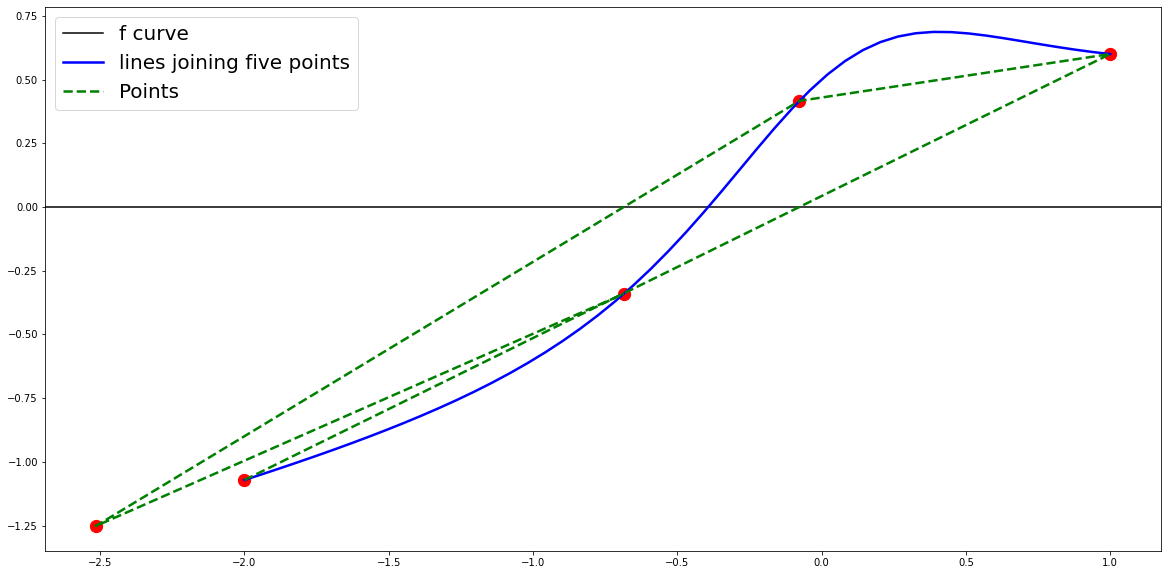

In [5]:
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.x_lim=(-2,1)
plt.y_lim=(1,-1.25)
plt.axhline(y=0,color="black")
x=np.linspace(-2,1)
y=(x**3-x**2+2*x+1)/(3*(x**2)+2)
def f(x):
    p=(x**3-x**2+2*x+1)/(3*(x**2)+2)
    return p
l=secant_method_list(f,-2,1,1e-12,100)
x1=[]
y1=[]
for i in range(0,5):
    mi=l[i]
    x1.append(mi[0])
    y1.append(mi[1])
plt.plot(x,y,color="blue",linewidth="2.5")
plt.scatter(x1,y1,color="red", s=150)
plt.plot(x1,y1,color="green",linewidth="2.5",linestyle="dashed")
plt.legend(["f curve","lines joining five points","Points"],loc="upper left",fontsize="20")
plt.show() 

**(d) [5 Marks]** 

Use the Secant Method (with the algorithm from above) together with plotting to find approximations of all zeros of the function 

$$
f(x) = 2/5 + x\sin(3/x).
$$

Display the plot and print all the zeros.

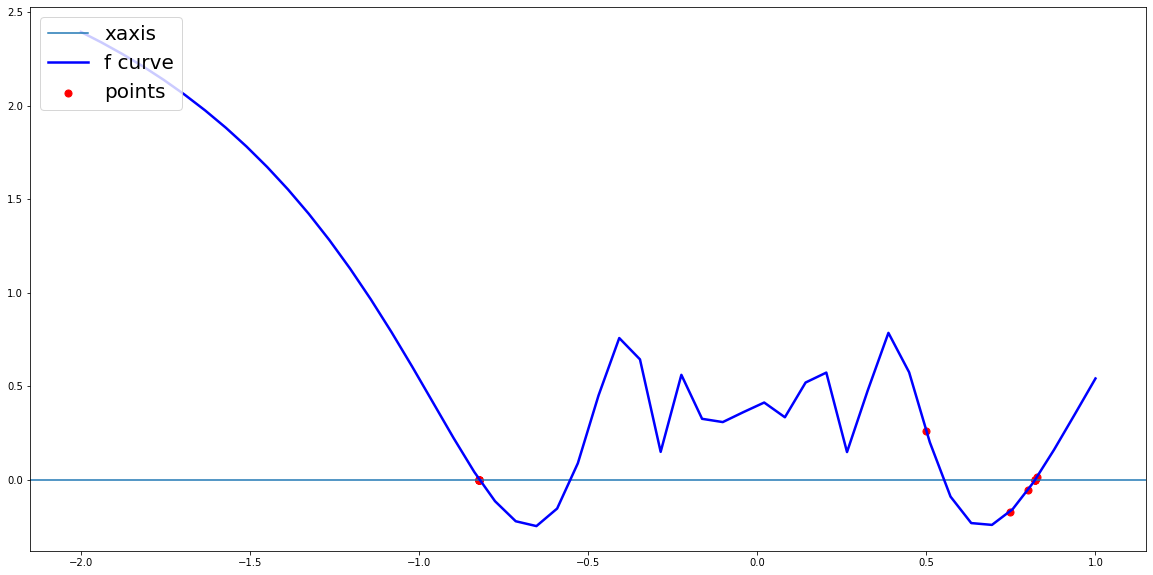

The following are the values of x for which the function has zeros :  [0.8262834119924864, 0.8212204505825731, 0.8219497599587698, 0.8219543142102625, 0.8219543093181398, 0.8219543093181723, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907, -0.821929262544907]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.x_lim=(-2,1)
plt.y_lim=(1,-1.25)
x=np.linspace(-2,1)
y=(2/5)+(x*np.sin(3/x))
plt.axhline(y=0)
def f(x):
    y=(2/5)+(x*np.sin(3/x))
    return y
l=secant_method_list(f,0.5,0.8,1e-12,100)
p=secant_method_list(f,-0.8,-0.5,1e-12,100)
x1=[]
y1=[]
x2=[]
y2=[]
for i in range(0,len(l)):
    mi=l[i]
    x1.append(mi[0])
    y1.append(mi[1])
for j in range(0,len(p)):
    mi=p[i]
    x2.append(mi[0])
    y2.append(mi[1])
plt.plot(x,y,color="blue",linewidth="2.5")
plt.scatter(x1,y1,color="red", s=50)
plt.scatter(x2,y2,color="red", s=50)
plt.legend(["xaxis","f curve","points"],loc="upper left",fontsize="20")
plt.show() 
zeros=[]
for g in range(0,len(x1)):
    if round(y1[g],1)==0:
        zeros.append(x1[g])
for h in range(0,len(x2)):
    if round(y2[h],1)==0:
        zeros.append(x2[h])
print("The following are the values of x for which the function has zeros : ",zeros)

## Question 2 [CAL]


**(a) [5 Marks]** 

Use the matplotlib package to plot the level curves of the function 
$$f: D \rightarrow \mathbb{R}$$ given by

$$
f(x,y) = xye^{−2x^2−y^4},
$$

where the domain $D \subseteq R^2$, is 
$$
D =\{(x,y)\;|\; x,y \in [−1,1]\}.
$$

Insert your code in the cell below and execute it to draw the plot.

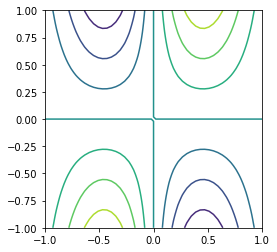

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = X*Y*(np.exp(((-2)*(x**2))-(y**4)))
ax.contour(X,Y,Z)
plt.show()

**(b) [5 Marks]** 

Use matplotlib to plot the surface $z = f(x,y)$ where $f$ is given as in (a).
Make sure that the axes and ticks of the plot look nice. In particular, make sure that there are only 5 ticks per axis shown. 
Insert your code in the cell below and execute it to draw the plot.

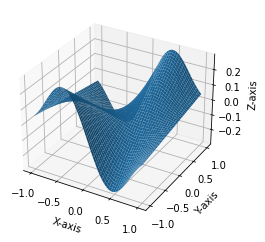

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d') 
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = X*Y*(np.exp(((-2)*(x**2))-(y**4)))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.plot_surface(X,Y,Z)
plt.show()

**(c) [5 Marks]** 

Use further plots around the maxima and minima visible from the plot in 2(a) to estimate the locations and values of the maxima and minima of $f(x,y)$ on $D$ to as much precision as you are able to.
Insert your code in the cell below to show your plots and calculations and clearly state your estimated answers.

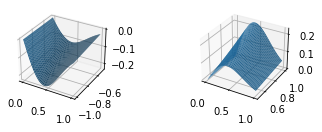

The location of minima(x,y): (0.4,-0.4) and value is: -0.2287894789652328
The location of maxima(x,y): (0.3,1.2) and value is: 0.2287894789652328


In [9]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(221,projection='3d') 
x1 = np.linspace(0,1)
y1 = np.linspace(-0.5,-1)
X1,Y1 = np.meshgrid(x1,y1)
Z1 = X1*Y1*(np.exp(((-2)*(x1**2))-(y1**4)))
ax.plot_surface(X1,Y1,Z1)
ax = fig.add_subplot(222,projection='3d') 
x2 = np.linspace(0,1)
y2 = np.linspace(0.5,1)
X2,Y2 = np.meshgrid(x2,y2)
Z2 = X2*Y2*(np.exp(((-2)*(x2**2))-(y2**4)))
ax.plot_surface(X2,Y2,Z2)
plt.show()
print("The location of minima(x,y): (0.4,-0.4) and value is:", Z1.min())
print("The location of maxima(x,y): (0.3,1.2) and value is:", Z2.max())

**(d) [5 Marks]**

Write a function which takes three parameters as input: two real numbers, $a$ and $t_{max}$, and an integer $n$. The function should generate a parametric 3D plot of the function $f:\mathbb{R}\rightarrow \mathbb{R}^{3}$ defined by $f(t)=(x(t),y(t),z(t))$ where 

$$
x(t)=\cos(at),\\
y(t)=(4+\sin(at))\cos(t),\\
z(t)=(4+\sin(at))\sin(t).
$$

and $t \in [0, t_{max}]$. The number of points on the curve should be given by the parameter $n$.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
def draw_plot(a,tmax,n):
    a=a
    at=np.linspace(0,a*tmax,n)
    t=np.linspace(0,tmax,n)
    AT,T=np.meshgrid(at,t)
    x=np.cos(AT)
    y=(4+np.sin(AT))*np.cos(T)
    z=(4+np.sin(AT))*np.sin(T)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x,y,z)
    ax.view_init(20,20)

Call the function `draw_plot` with the following parameters: 

- $a=2\pi$, $t_{max}=2\pi$, $n=1000$
- $a=2\pi$, $t_{max}=20\pi$, $n=1000$

in two different cells below.

Use your function, and if necessary, different "viewpoints", to describe which geometric object the function $f$ describes when $a=2\pi$. Write your answer in a Markdown-formatted cell below the plots. 

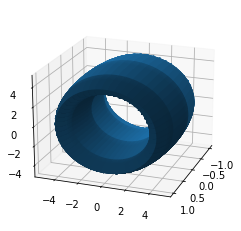

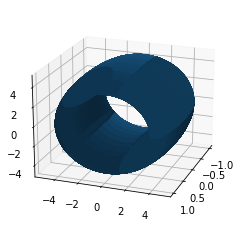

In [11]:
draw_plot(2*np.pi,2*np.pi,1000)



draw_plot(2*np.pi,20*np.pi,1000)



The function f describes a hollow cylinder with rounded edges when a=2pi with different thickeness depending on the value of tmax. It is thicker when tmax=20*pi 

## Question 3 [LMA]

We have seen that it is possible to do linear algebra in NumPy with matrices described by 2-dimensional arrays. 
In this question we will write a function to perform Gaussian Elimination in Python using NumPy.

**(a) [5 Marks]**

Write a function that takes as input a matrix $A$ (given as a 2-dimensional NumPy-array) and two integers $i$ and $j$  and returns the entry in column $j$ with maximum absolute value amongst rows $i,i+1,..$ together with its row index (counted in the entire matrix).

In other words, if $A$ is an $r\times k$ matrix,  $A=(a_{mn})$ where $0\le m\le r-1$ and $0\le n\le k-1$, then the function should return 

$$
\max\{|a_{mj}|\; : {i \le m < r } \},
$$

together with the value of $m$ for which this maximum occurs. 
Note that indexing for rows and columns are counted from $0$ as usual. 

The function should raise a `ValueError` if the input $i$ is not the index of a row of $A$ or if $j$ 
is not the index of a column of $A$. 

In [12]:
def find_max_column_value(A,i,j):
    t=A.shape
    r=t[0]
    k=t[1]
    if i not in range(0,r):
        raise ValueError("Out of Index")
    if j not in range(0,k):
        raise ValueError("Out of Index")
    array=[]
    N=0
    for m in range(0,r):
        p=A[m,j]
        array.append(p)
    amj=max(array)
    max_amj=array.index(max(array))
    return(amj,max_amj)

In [13]:
# Check that the correct maximum is returned
# Marks: 5
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_less_equal,assert_greater_equal,assert_not_equal
import math
import numpy as np
A = np.array([[ 9,  6,  7,  8,  1,  7,  2], [ 8,  2,  6,  5,  1,  5,  3], [ 7,  3,  1,  4,  5, 10,  1],
              [10,  5,  7,  5,  4,  6,  2], [ 5,  5,  2,  6,  4,  2,  7]])
assert_equal(find_max_column_value(A,0,0),(10,3))
assert_equal(find_max_column_value(A,2,4),(5,2))
assert_raises(ValueError,find_max_column_value,A,-1,0)
assert_raises(ValueError,find_max_column_value,A,10,0)


**(b) [Marks 5]** 

Write two functions `swap_rows` and `swap_cols` that both take as input a matrix $A$ and two integers $i$ and $j$, and returns a copy of the matrix $A$ where the  rows $i$ and $j$, or columns $i$ and $j$, are swapped respectively. 

The function should raise a `ValueError` if the input $i$ or $j$ is not the index of a row or column of $A$ respectively.


In [14]:
def swap_rows(A,i,j):
    B=A.copy()
    r=B.shape[0]
    k=B.shape[1]
    if i<0 or i>=r:
        raise ValueError("Out of Index")
    if j<0 or j>=r:
        raise ValueError("Out of Index")
    array1=B[i,]
    array2=B[j,]
    t=0
    for i in range(0,len(array1)):
        t=array1[i]
        array1[i]=array2[i]
        array2[i]=t
    return B

In [15]:
def swap_cols(A,i,j):
    B=A.copy()
    r=B.shape[0]
    k=B.shape[1]
    if i<0 or i>=k:
        raise ValueError("Out of Index")
    if j<0 or j>=k:
        raise ValueError("Out of Index")
    array1=B[:,i]
    array2=B[:,j]
    t=0
    for i in range(0,len(array1)):
        t=array1[i]
        array1[i]=array2[i]
        array2[i]=t
    return B

In [16]:
# Check that the function 'swap_rows' works as expected
# Marks: 3
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_less_equal,assert_greater_equal,assert_not_equal
import math
import numpy as np
A = np.array([[ 9,  6,  7,  8,  1,  7,  2], 
              [ 8,  2,  6,  5,  1,  5,  3], 
              [ 7,  3,  1,  4,  5, 10,  1],
              [10,  5,  7,  5,  4,  6,  2], 
              [ 5,  5,  2,  6,  4,  2,  7]])
A1 = np.array([[ 7,  3,  1,  4,  5, 10,  1], 
               [ 8,  2,  6,  5,  1,  5,  3], 
               [ 9,  6,  7,  8,  1,  7,  2] ,
              [10,  5,  7,  5,  4,  6,  2], 
               [ 5,  5,  2,  6,  4,  2,  7]])

assert_equal( (swap_rows(A,0,2)==A1).all(),True)
# check that a ValueError is raised if we try to swap rows outside the bound
assert_raises(ValueError,swap_rows,A,-1,1)
assert_raises(ValueError,swap_rows,A,5,-1)


In [17]:
# Check that the function `swap_cols` works as expected
# Marks: 2
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_less_equal,assert_greater_equal,assert_not_equal
import math
import numpy as np
A = np.array([[ 9,  6,  7,  8,  1,  7,  2], 
              [ 8,  2,  6,  5,  1,  5,  3], 
              [ 7,  3,  1,  4,  5, 10,  1],
              [10,  5,  7,  5,  4,  6,  2], 
              [ 5,  5,  2,  6,  4,  2,  7]])
A1 = np.array([[ 8,  6,  7,  9,  1,  7,  2], 
               [ 5,  2,  6,  8,  1,  5,  3], 
               [ 4,  3,  1,  7,  5, 10,  1],
               [ 5,  5,  7,  10,  4,  6,  2], 
               [ 6,  5,  2,  5,  4,  2,  7]])

assert_equal( (swap_cols(A,0,3)==A1).all(),True)

assert_raises(ValueError,swap_cols,A,-1,1)
assert_raises(ValueError,swap_cols,A,7,1)


**(c) [5 Marks]** 

Write a function that takes as input a matrix $A$, two integers $i$ and $j$ and a real number $a$, and returns a copy of $A$ where row $i$ is replaced by row $i$ plus $a$ times row $j$.

You can assume that the matrix and the parameter $a$ are both given as double precision floating point numbers, i.e. the matrix $A$ has `dtype='float64'`.

The function should raise a `ValueError` if the input $i$ or $j$ is not the index of a row of $A$.

In [18]:
def add_row(A,i,j,a):
    B=A.copy()
    a=float(a)
    r=B.shape[0]
    k=B.shape[1]
    if i<0 or i>=r:
        raise ValueError("Out of Index")
    if j<0 or j>=r:
        raise ValueError("Out of Index")
    
    array1=B[i,]
    array2=B[j,]
    t=0
    for p in range(0,k):
        array1[p]=array1[p]+(a*array2[p])
    return B

In [19]:
# Check that the 'add_row' function works as expected and add rows when it should and 
# that the test for indices out of bounds for columns and rows work
# Marks: 5
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_less_equal,assert_greater_equal,assert_not_equal
import math
import numpy as np
A = np.array([[ 9,  6,  7,  8,  1,  7,  2], 
              [ 8,  2,  6,  5,  1,  5,  3], 
              [ 7,  3,  1,  4,  5, 10,  1],
              [10,  5,  7,  5,  4,  6,  2], 
              [ 5,  5,  2,  6,  4,  2,  7]], dtype='float64')
A1 = np.array([[23, 12,  9, 16, 11, 27,  4], 
               [ 8,  2,  6,  5,  1,  5,  3], 
               [ 7,  3,  1,  4,  5, 10,  1],
              [10,  5,  7,  5,  4,  6,  2], 
               [ 5,  5,  2,  6,  4,  2,  7]], dtype='float64')
A2 = np.array([[13. ,  7. , 10. , 10.5,  1.5,  9.5,  3.5], 
               [ 8,  2,  6,  5,  1,  5,  3], 
               [ 7,  3,  1,  4,  5, 10,  1],
              [10,  5,  7,  5,  4,  6,  2], 
               [ 5,  5,  2,  6,  4,  2,  7]], dtype='float64')

# Check that operations are carried out correctly
assert_equal( (add_row(A,0,2,2)==A1).all(),True)
assert_equal( (add_row(A,1,3,0)==A).all(),True)
assert_equal( (add_row(A,0,1,0.5)==A2).all(),True)

# Check that errors in parameters are handled
assert_raises(ValueError,add_row,A,-1,1,1)
assert_raises(ValueError,add_row,A,7,14,1)



**(d) [5 Marks]** 

Write a function 'Gaussian_elimination' which implements the following version of the Gaussian Elimination algorithm by using the functions you have written above. 

Assume that $A=(a_{mn})$ is an $r \times k$ matrix of type `'float32'` or `'float64'`. Then the Gauss Elimination algorithm can be written as:

- Iterate over each column in turn. 
- For each column, $j$, find the maximum absolute value below the diagonal and if larger than the diagonal value then swap the current row for the row corresponding to the maximum.
- If the maximum value is 0 continue with next column.
- Otherwise use row operations to eliminate values in the current column from all rows below the diagonal.
- Once we have reached the end of the columns, return the current matrix. 

Additionally:

- The function should raise a ValueError if the `dtype` is not `'float32'` or `'float64'`.
- To make the final output nicer you can set all matrix elements that satisfy 

$$
|a_{mn}|<\min\{r,k\}\epsilon
$$ to $0$, where $\epsilon=1.19\cdot 10^{-7}$ (The number $\epsilon$ is sometimes called "machine-epsilon" and can be obtained in NumPy for single precision floating point numbers as `np.finfo('float32').eps`)

Note: For testing your function you can create random matrices with integer entries and `dtype='float32'` using the code:

```
rng = np.random.default_rng()
A = rng.integers(1,10,size=(3,4),endpoint=True)
A.dtype='float32'
```

In [20]:
def Gauss_elimination(A):
    if A.dtype!='float32' and A.dtype!='float64':
        raise ValueError("The matric must be of dtype float32,float64 or float128")
    rows=A.shape[0]
    columns=A.shape[1]
    diagonal=A.diagonal()
    for j in range(0,columns):
        while j+1!=columns:
            each_column=A[:,j]
            max=find_max_column_value(A,0,j)
            max_value=max[0]
            max_value_loc=max[1]
            if max_value>diagonal[j] and max_value!=0:
                swap=swap_rows(A,j,max_value_loc)
                swap_diagonal=swap.diagonal()
                ratio=swap[j+1][j]/swap_diagonal[j]
                for i in range(0,rows):
                    swap[j+1][i]=swap[j+1][i]-(ratio*swap[j][i])
            elif max_value==0:
                continue
    return swap        

In [ ]:
# Tests to check that the Gauss_elimination algorithm computes the corect values and produces a matrix in Echelon form
# Marks: 5
from nose.tools import assert_equal,assert_almost_equal,assert_raises,assert_less_equal,assert_greater_equal,assert_not_equal
import math
import numpy as np

# Function to check that the returned matrix is in Echelon form
def is_Echelon(A):
    numrows,numcols = A.shape
    eps = np.finfo(A.dtype).eps
    for i in range(numrows):
        for j in range(0,i):
            # check that all elements below/ to the left of the diagonal are zero up to a certain error
            if abs(A[i,j]) > max(numcols,numrows)*eps:
                return False
    return True

# Check that the function raises errors if the input is not of type 'float32', 'float64' or 'float128'
assert_raises(ValueError,Gauss_elimination,np.array([[1,2],[3,4]]))

# A simple test matrix
A = np.array([[1,2],[3,4]],dtype='float32')
A1 = np.array([[3., 4.], [0., 0.66666667]])
# Check that Echelon form is correct
assert_equal(is_Echelon(Gauss_elimination(A)),True)
# Check that the Gauss elimination is calculated correctly to decent precision.
assert_almost_equal( (Gauss_elimination(A)-A1).max(),0,7)

# Check that it works if one column becomes 0
A = np.array([[1,2],[2,4]],dtype='float32')
A1 = np.array([[2., 4.], [0., 0.]])
assert_almost_equal( (Gauss_elimination(A)-A1).max(),0,7)

# A larger test matrix A 
A = np.array([[ 9.,  6.,  7.,  8.,  1.,  7.,  2.],
       [ 8.,  2.,  6.,  5.,  1.,  5.,  3.],
       [ 7.,  3.,  1.,  4.,  5., 10.,  1.],
       [10.,  5.,  7.,  5.,  4.,  6.,  2.],
       [ 5.,  5.,  2.,  6.,  4.,  2.,  7.]])
# It's Echelon reduced form
A1 = np.array([[10.0, 5.0, 7.0, 5.0, 4.0, 6.0, 2.0], 
               [0.0, 2.5, -1.5, 3.5, 2.0, -1.0, 6.0], 
               [0.0, 0.0, -4.2, 1.2, 2.6, 5.6, 0.8], 
               [0.0, 0.0, 0.0, 3.5714285714285716, -1.0952380952380956, -1.6666666666666679, 6.047619047619048], 
               [0.0, 0.0, 0.0, 0.0, -2.24, 5.199999999999999, -6.239999999999999]])
# Check that the Echelon form is correct
assert_equal(is_Echelon(Gauss_elimination(A)),True)
# Check that the Gauss elimination is calculated correctly to decent precision.
assert_almost_equal( (Gauss_elimination(A)-A1).max(),0,7)

